### Project Task: 

Your company has tased you with developing algorithms which use a broad spectrum of features to predict realty prices. We can rely on only a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow your company to provide more certainty to their customers in an uncertain economy.

Proposal:

https://www.kaggle.com/c/sberbank-russian-housing-market/overview

price_doc: Sale price (this is the target variable)

Task to be performed:

1. Data analysis 
2. Data cleaning
3. Outlier Analysis
3. Feature Engineering
4. Model Creation
5. Model Evaluation
6. Hyperparameter Tuning

#### Reading data from CSV files

In [1]:
import pandas as pd
train = pd.read_csv('sberbank-russian-housing-market/train.csv')
macro = pd.read_csv('sberbank-russian-housing-market/macro.csv')

In [2]:
train = pd.merge(train, macro, how='left', on='timestamp')

In [3]:
print(train.shape)
train.head()

(30471, 391)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


In [4]:
train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,753.0,30471.000000,13570.000000,30471.000000,13570.000000,30471.000000,27232.000000,13570.000000,27232.000000,30471.000000
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,271.0,9744.564143,615.001326,0.447397,1382.187988,366627.117423,26.677108,72.552108,44910.638807,229594.127331
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,0.0,857.611244,16.575729,0.005793,70.691413,55080.176499,2.016525,4.433342,3854.550878,2767.547945
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,271.0,6943.000000,565.000000,0.439390,1240.000000,269768.000000,22.370000,64.120000,23587.000000,226047.300000
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,271.0,9350.000000,603.000000,0.439390,1309.000000,329348.000000,26.700000,67.850000,46080.000000,226047.300000
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,271.0,10311.000000,627.000000,0.447840,1440.000000,398451.000000,28.200000,76.200000,46080.000000,229294.800000
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,271.0,10311.000000,627.000000,0.450700,1440.000000,398451.000000,28.200000,76.200000,46352.000000,232840.200000
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,271.0,10805.000000,627.000000,0.458880,1440.000000,463938.000000,28.200000,76.200000,46352.000000,234576.900000


#### Here we can see that the number of columns reduced, this happened because describe was only for numerical continuous data and doesn't include the non-numerical data.

#### Checking the target variable

#### Target Variable histogram showing distribution

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(train['price_doc'],bins = 50, color = 'green')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

#### In pricing dataset we can see that there is a lot of skeness in the target variable and taking logarithm can give a good normal distribution

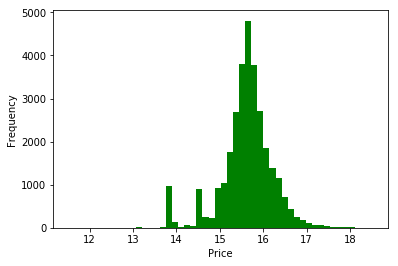

In [6]:
price_log = np.log(train['price_doc'])
plt.hist(price_log,bins = 50,color = 'green')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### We can so one more check to see the distribution of the price variable

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


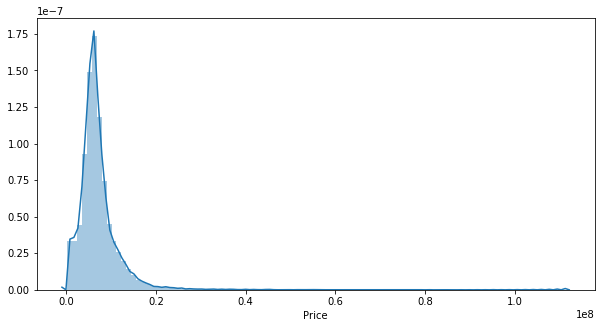

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(train['price_doc'], bins=100)
plt.xlabel('Price')
plt.show()

#### Now as what we did above we will take log of price variable to better visualize the distribution as everything is scaled down when we take log

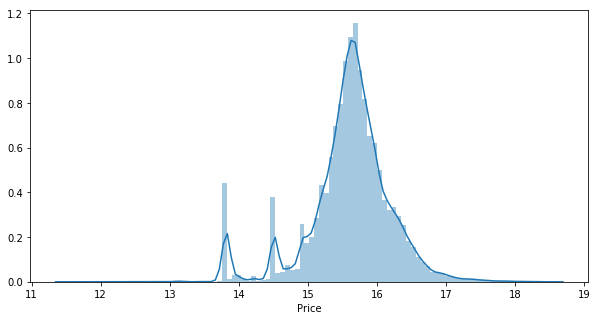

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(price_log, bins=100)
plt.xlabel('Price')
plt.show()

#### This shows that there is a lot of skewness in the dataset.

#### Next we check any outliers in the data for price variable. 

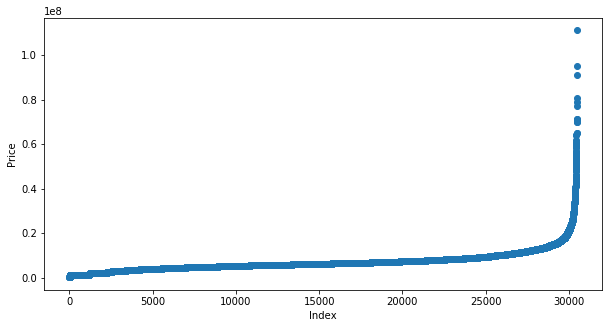

In [9]:

plt.figure(figsize=(10,5))
plt.scatter(range(train.shape[0]), np.sort(train.price_doc.values))
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

#### We can see that there are some noticeable outliers in the target variable.

#### Another outlier analysis for price variable.

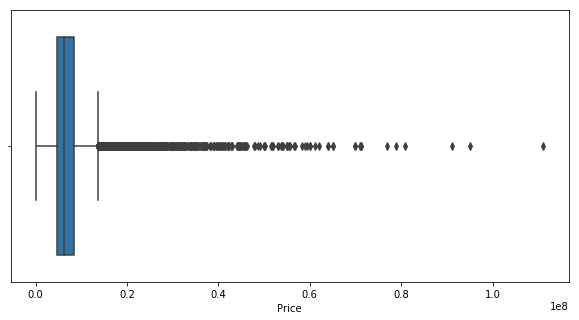

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(train.price_doc.values)
plt.xlabel('Price')
plt.show()

#### Similarly here we can clearly see that there are some noticeable outliers in the target variable.

#### Next important thing is to check if there are any missing values in the dataset

In [11]:
train.isnull()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


#### We will now see how many columns have 50% or more data missing

In [12]:
nullValues = train.isnull().mean(axis=0) > 0.50
meanNullValues = np.mean(nullValues)
print("{:.3%}  columns have more than 50% missing values ".format(meanNullValues))

1.535%  columns have more than 50% missing values 


#### Removing the 1.535% columns which have more than 50% of nan/missing values as they do not provide significant information.

In [13]:
miss=[]
for x in train.columns:
    if((train[x].isnull().sum()/len(train) )* 100 > 50):
         miss.append(x)

train.drop(columns = miss,inplace = True, axis = 1)


#### So i have taken those columns with missing values and stored them in a separate array called miss instead of completely removing it.

In [14]:
train.shape

(30471, 385)

#### We initially had 391 columns and after dropping the columns with 50% or more missing data we now have only 385 columns left.

[Text(0, 0.5, 'Missing Data Representation'),
 Text(0.5, 1.0, 'Missing values percentage')]

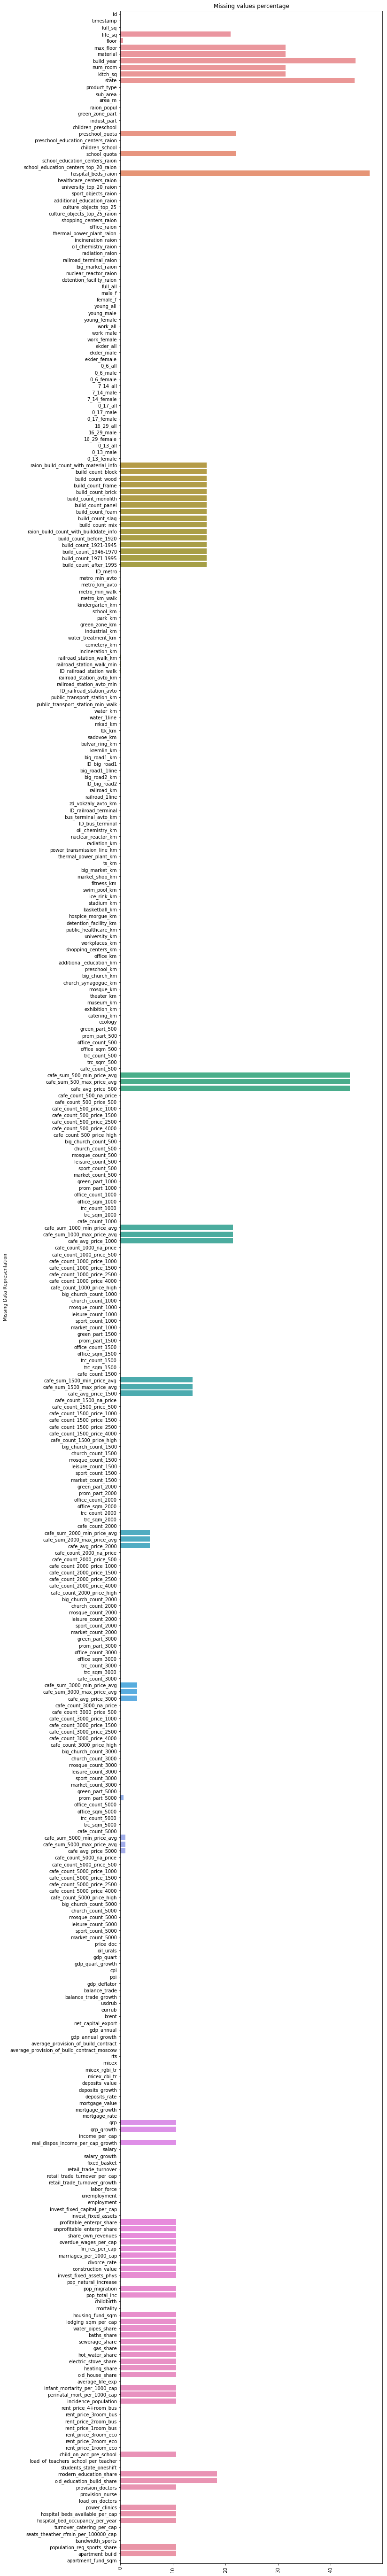

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Missing_data = (train.isnull().sum()/len(train) )* 100 #Percentage of missing data in each column
x, y = plt.subplots(figsize=(10, 100))
plt.xticks(rotation='90')
sns.barplot(x=Missing_data, y= Missing_data.index)
y.set(title='Missing values percentage', ylabel='Missing Data Representation')

#### We can see that there are missing values and they seem to be in groups

#### So we impute the missing values first by using median.

In [16]:
train.fillna(train.median(), inplace = True) #Imputing the missing values by the median of each column

In [17]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,8180.755454,375.8,846.0,302.0,6943.0,0.45356,269768.0,22.37,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,8180.755454,375.8,846.0,302.0,6943.0,0.45356,269768.0,22.37,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,8180.755454,375.8,846.0,302.0,6943.0,0.45356,269768.0,22.37,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,8180.755454,375.8,846.0,302.0,6943.0,0.45356,269768.0,22.37,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,8180.755454,375.8,846.0,302.0,6943.0,0.45356,269768.0,22.37,23587.0,230310.0


In [18]:
train.isnull() #Checking for missing values after imputing 

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### We can see that there are no more missing values.

#### Next big thing to look at is handling timestamp and extracting useful information out of it

In [19]:
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+ "-" +x[5:7])
train['year'] = train['timestamp'].apply(lambda x: x[:4])
train['month'] = train['timestamp'].apply(lambda x: x[5:7])
train['day'] = train['timestamp'].apply(lambda x: x[8:10])
yearly_price = train.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()

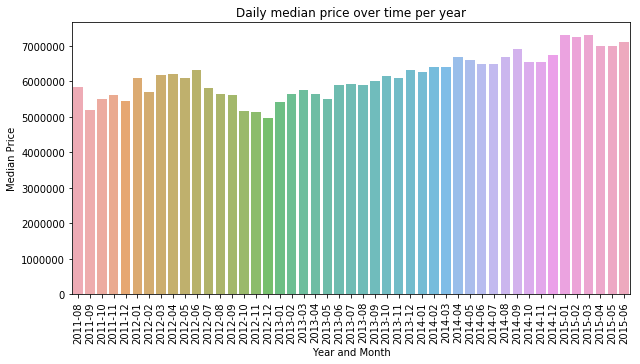

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(yearly_price.yearmonth.values, yearly_price.price_doc.values, alpha=0.8)
plt.ylabel('Median Price')
plt.xlabel('Year and Month')
plt.xticks(rotation= '90')
plt.title('Daily median price over time per year')
plt.show()

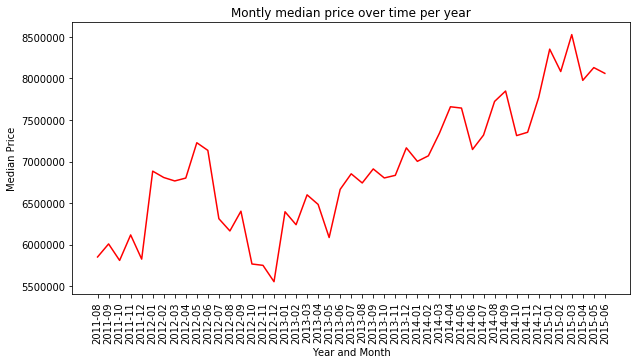

In [21]:
plt.figure(figsize=(10,5))
ts_df = train.groupby('yearmonth')[['price_doc']].mean()
plt.plot(ts_df.index, ts_df['price_doc'], color='r', )
plt.ylabel('Median Price')
plt.xlabel('Year and Month')
plt.xticks(rotation='90')
plt.title('Montly median price over time per year')
plt.show()

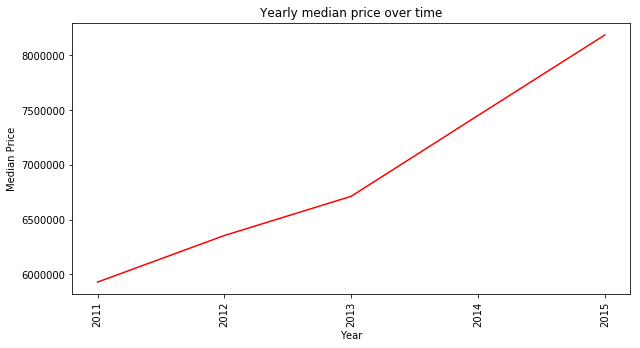

In [22]:
plt.figure(figsize=(10,5))
ts_df = train.groupby('year')[['price_doc']].mean()
plt.plot(ts_df.index, ts_df['price_doc'], color='r', )
plt.ylabel('Median Price')
plt.xlabel('Year')
plt.xticks(rotation='90')
plt.title('Yearly median price over time')
plt.show()

#### From the above observations we can conclude that from February 2013 the price has been linearly increasing 

#### Outlier Analysis

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Monthly Price')]

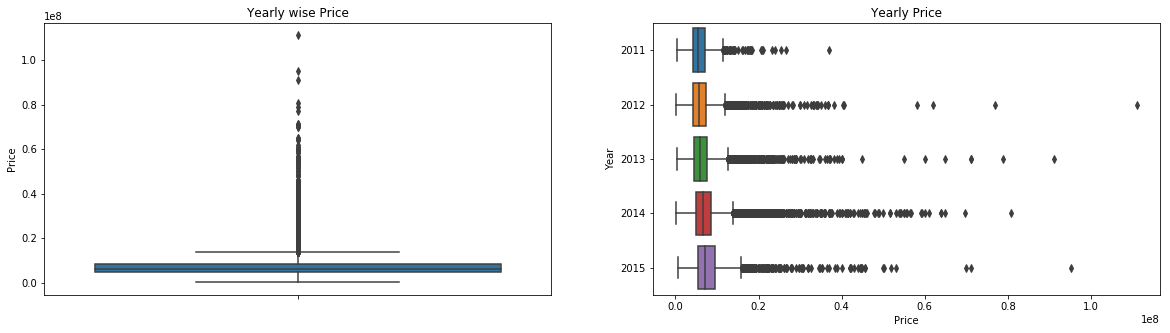

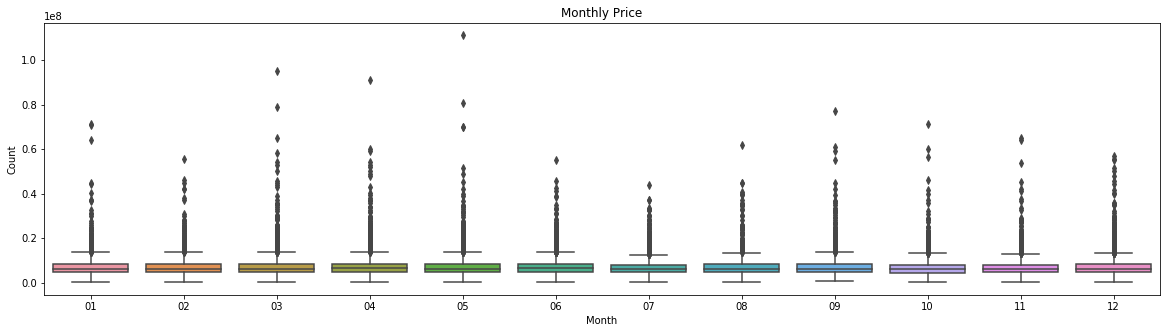

In [23]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,5)

sns.boxplot(data=train,y="price_doc",ax=ax1)
sns.boxplot(data=train,x="price_doc",y="year",orient="h",ax=ax2)

fig1,ax3 = plt.subplots()
fig1.set_size_inches(20,5)
sns.boxplot(data=train,x="month",y="price_doc",orient="v",ax=ax3)
ax1.set(ylabel='Price',title="Yearly wise Price")
ax2.set(xlabel='Price', ylabel='Year',title="Yearly Price")
ax3.set(xlabel='Month', ylabel='Count',title="Monthly Price")

#### Some important variables of the dataset and their description from the data dictionary are listed below:

floor - for apartments, floor of the building

max_floor - number of floors in the building

build_year - year built

full_sq - total area in square meters, including loggias, balconies and other non-residential areas

life_sq - living area in square meters, excluding loggias, balconies and other non-residential areas

#### We will look at each one of them

#### Floor

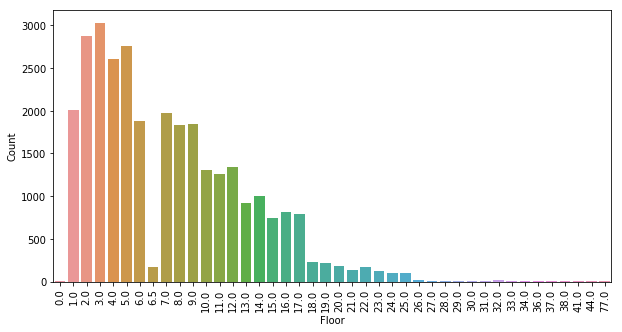

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x="floor", data=train)
plt.ylabel('Count')
plt.xlabel('Floor')
plt.xticks(rotation='90')
plt.show()

#### I am guessing the floor 0 here means the ground level. And another important we observe is the distribution of floors is right skewed. Now let's look at how it affects price. There also seems to be a floor 6.5 which seems to wrong

#### So i am fixing this error value by replacing it 7

In [25]:
train.loc[train['floor'] == 6.5, 'floor'] = 7

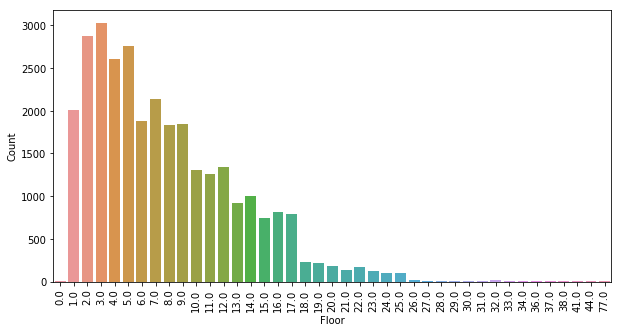

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x="floor", data=train)
plt.ylabel('Count')
plt.xlabel('Floor')
plt.xticks(rotation='90')
plt.show()

#### Floors vs Price

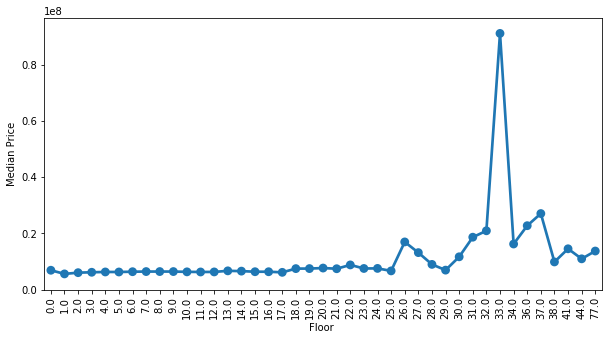

In [27]:
floor_price = train.groupby('floor')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(10,5))
sns.pointplot(floor_price.floor.values, floor_price.price_doc.values)
plt.ylabel('Median Price')
plt.xlabel('Floor ')
plt.xticks(rotation='90')
plt.show()

#### Some observations made after this are: The price seems to be constant until floor 18, after floor 18 there has been a significant increase in price and it seems that floors 33 has the highest price

#### Max floor
    
#### Total number of floors present in the building is a important variable


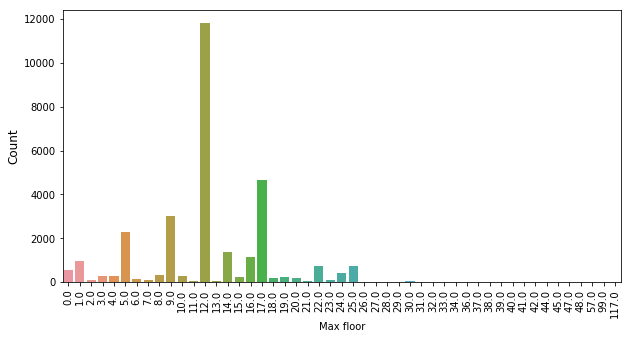

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x= train['max_floor'], data=train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Max floor')
plt.xticks(rotation='vertical')
plt.show()

#### The spikes in floors 5, 7,9,12,17 which are similar to floor number graph above show that there could some restriction on the maximum number of floors a building could have.

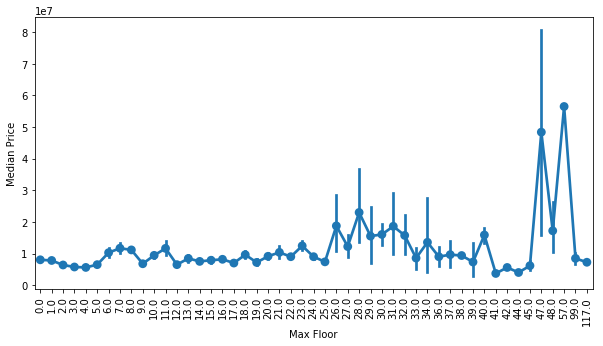

In [29]:
plt.figure(figsize=(10,5))
sns.pointplot(x= train['max_floor'], y= train['price_doc'], data=train)
plt.ylabel('Median Price')
plt.xlabel('Max Floor')
plt.xticks(rotation='90')
plt.show()

#### Some observations made after this are: The price varying a lot but it is significantly high when the max floors of the building are from 47 floors to 57 floors

#### Build year

[Text(0.5, 1.0, 'Distribution of build year')]

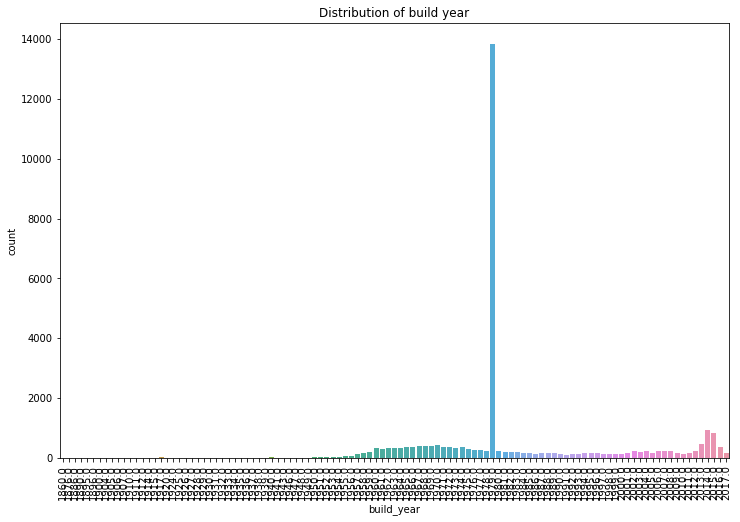

In [30]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
ind = train[(train['build_year'] <= 1691) | (train['build_year'] >= 2018)].index
by_df = train.drop(ind).sort_values(by=['build_year'])
sns.countplot(x=by_df['build_year'])
ax.set(title='Distribution of build year')

#### There seems to be a build year 20052009 which seems to wrong

#### Fixing the error value by replacing it with 2007

In [31]:
train.loc[train['build_year'] == 20052009, 'build_year'] = 2007

[Text(0.5, 1.0, 'Distribution of build year')]

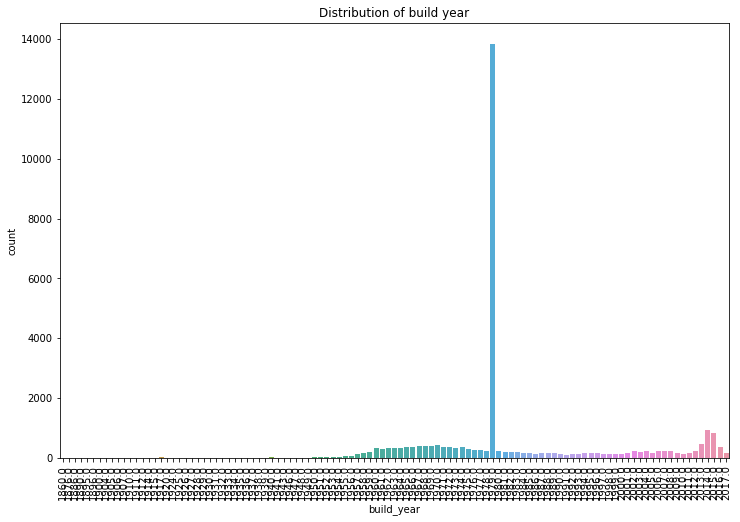

In [32]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
ind = train[(train['build_year'] <= 1691) | (train['build_year'] >= 2018)].index
by_df = train.drop(ind).sort_values(by=['build_year'])
sns.countplot(x=by_df['build_year'])
ax.set(title='Distribution of build year')

#### Build Year vs Price

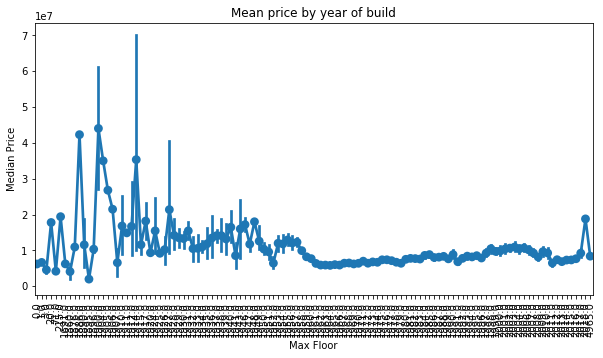

In [33]:
plt.figure(figsize=(10,5))
sns.pointplot(x= train['build_year'], y= train['price_doc'], data=train)
plt.ylabel('Median Price')
plt.xlabel('Max Floor')
plt.title('Mean price by year of build')
plt.xticks(rotation='90')
plt.show()

#### Room count

#### Next we could look at a distribution of room count


Text(0.5, 0, 'Number of rooms')

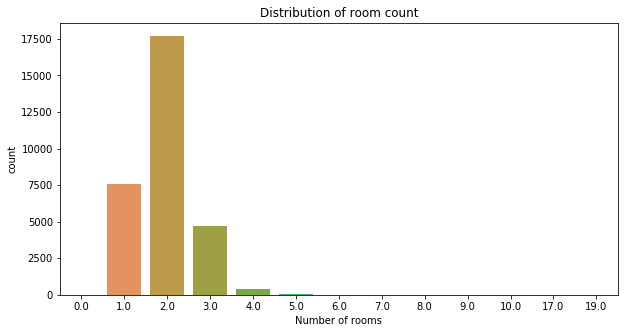

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['num_room'])
plt.title('Distribution of room count')
plt.xlabel('Number of rooms')

#### We can conclude that maximum number of apartments have 2 rooms.

#### Full_sq

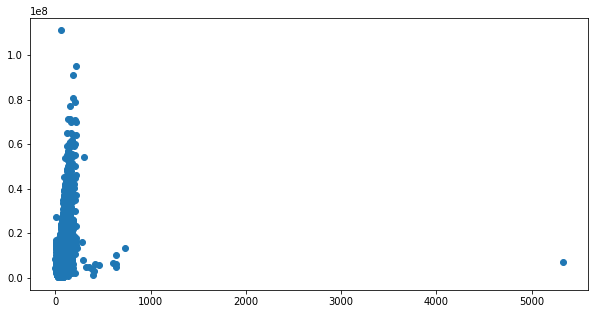

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(x=train['full_sq'], y=train['price_doc'])

Text(0, 0.5, 'Price')

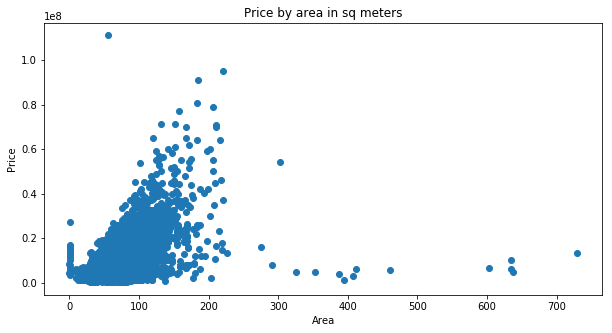

In [36]:
plt.figure(figsize=(10,5))
ind = train[train['full_sq'] > 2000].index
plt.scatter(x=train.drop(ind)['full_sq'], y=train.drop(ind)['price_doc'])
plt.title('Price by area in sq meters')
plt.xlabel('Area') 
plt.ylabel('Price')

#### Life_sq


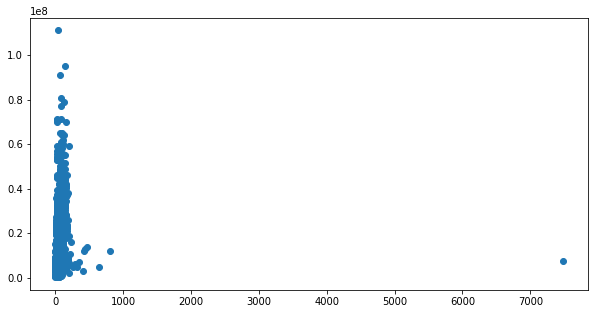

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(x=train['life_sq'], y=train['price_doc'])

#### Kitchen_sq

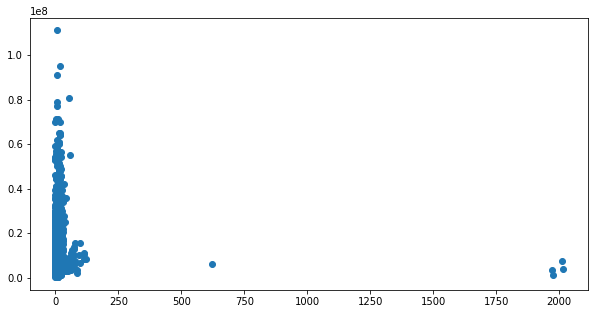

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(x=train['kitch_sq'], y=train['price_doc'])

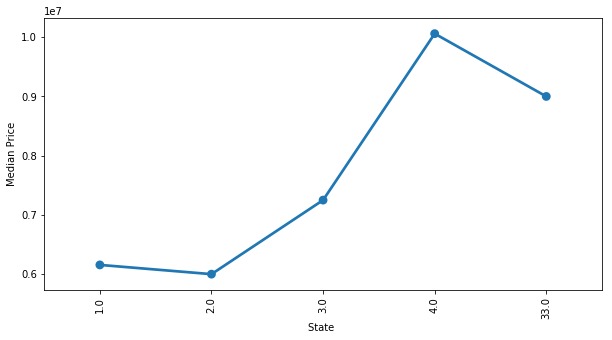

In [39]:
state_price = train.groupby('state')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(10,5))
sns.pointplot(state_price.state.values, state_price.price_doc.values)
plt.ylabel('Median Price')
plt.xlabel('State ')
plt.xticks(rotation='90')
plt.show()

#### The state is a discrete value between 1 and 4. There seems to be an errorneus value 33 in it.


In [40]:
train.loc[train['state'] == 33, 'state'] = train['state'].mode().iloc[0]

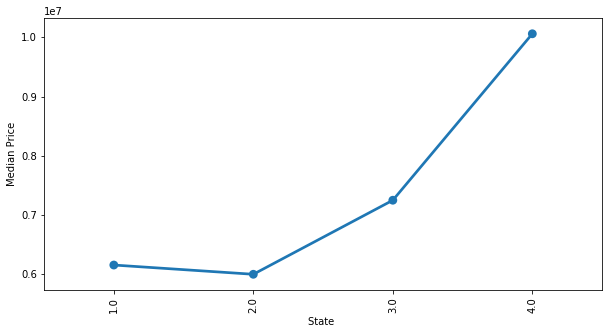

In [41]:
state_price = train.groupby('state')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(10,5))
sns.pointplot(state_price.state.values, state_price.price_doc.values)
plt.ylabel('Median Price')
plt.xlabel('State ')
plt.xticks(rotation='90')
plt.show()

#### After fixing the error value we can see that after state 2 there has only been an increase in price for state 3 and state 4

#### Now we can get the correlation between these important features who are useful in determing the price

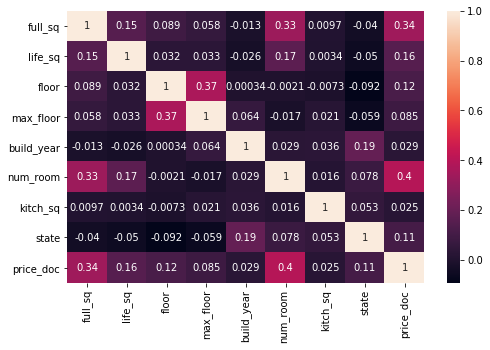

In [42]:
ImportantFeatures = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']
correration_matrix = train[ImportantFeatures].corr()
f, ax = plt.subplots(figsize=(8, 5))
plt.xticks(rotation='90')
sns.heatmap(correration_matrix, annot=True)

#### Now we are done with Data Analysis, Data cleaning, Feature Engineering and Outlier Analysis

#### We now look at model creation and evaluation. We are going to look at three types of models namely:

1. Linear Regression
    
2. Decision Tree Regressor

3. Random Forest Regressor

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # import the random forest model
from sklearn import  preprocessing


train_data = pd.read_csv('sberbank-russian-housing-market/train.csv')
macro_data= pd.read_csv('sberbank-russian-housing-market/macro.csv')
train_data= pd.merge(train_data, macro_data, how='left', on='timestamp')

train_data = pd.get_dummies(train_data).astype(np.float64) #This is for handling Object DataTypes

y = np.log(train['price_doc'])

train_data = train_data.drop(['price_doc'], axis=1)
train_data = train_data.drop(['id'], axis=1)

miss= []
for x in train_data.columns:
    if((train_data[x].isnull().sum()/len(train_data) )* 100 > 50):
         miss.append(x)

train_data.drop(columns = miss,inplace = True, axis = 1)

train_data.fillna(train_data.median(), inplace = True)
X= train_data


In [44]:
X.shape

(30471, 1712)

In [45]:
y.shape

(30471,)

#### First, we split the data into train and test

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



#### Linear Regression

In [47]:
classifier = LinearRegression() 
classifier.fit(X_train , y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)



In [48]:
training_error_lr = np.sqrt(np.mean((y_pred_train  - y_train)**2))
testing_error_lr = np.sqrt(np.mean((y_pred_test  - y_test)**2))
print("Training error in linear regression is: %0.3f" % training_error_lr)
print("Testing error in linear regression is: %0.3f" % testing_error_lr)

Training error in linear regression is: 0.476
Testing error in linear regression is: 5.303


#### Plotting the regression line for linear regression

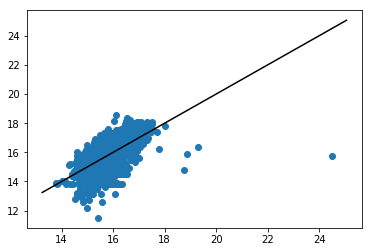

In [49]:
fig, ax = plt.subplots()
plt.scatter(y_pred_train, y_train)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color = 'black')
plt.show()


In [50]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = mean_squared_error(y_pred_test, y_test)**0.5
sse = np.sum((y_pred_test - y_test)**2)
se = (sse/len(y_test))**0.5
print('R2-Score is : %0.2f ' % r2)
print('SE is : %0.2f ' % se)
print('SSE is : %0.2f ' % sse)
print('MSE is : %0.2f ' % mse)
print('RMSE: %0.2f ' % rmse)

R2-Score is : -74.32 
SE is : 5.30 
SSE is : 171371.76 
MSE is : 28.12 
RMSE: 5.30 


#### Decision Tree Regressor

In [51]:
classifier = DecisionTreeRegressor(max_depth = 3)

classifier.fit(X = X_train, y = y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [53]:
training_error_dt = np.sqrt(np.mean((y_pred_train  - y_train)**2))
testing_error_dt = np.sqrt(np.mean((y_pred_test  - y_test)**2))
print("Training error in Decision Tree Classifier is: %0.3f" % training_error_dt)
print("Testing error in Decision Tree Classifier is: %0.3f" % testing_error_dt)

Training error in Decision Tree Classifier is: 0.505
Testing error in Decision Tree Classifier is: 0.507


#### Plotting the regression line for Decision Tree Regressor

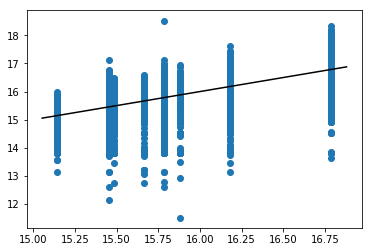

In [54]:
fig, ax = plt.subplots()
plt.scatter(y_pred_train, y_train)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color = 'black')
plt.show()



In [55]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = mean_squared_error(y_pred_test, y_test)**0.5
sse = np.sum((y_pred_test - y_test)**2)
se = (sse/len(y_test))**0.5
print('R2-Score is : %0.2f ' % r2)
print('SE is : %0.2f ' % se)
print('SSE is : %0.2f ' % sse)
print('MSE is : %0.2f ' % mse)
print('RMSE: %0.2f ' % rmse)

R2-Score is : 0.31 
SE is : 0.51 
SSE is : 1565.78 
MSE is : 0.26 
RMSE: 0.51 


#### Random Forest

In [56]:
classifier = RandomForestRegressor(n_estimators = 30, 
                              random_state = 2017, 
                              oob_score = True, 
                              max_features = 20,
                              min_samples_leaf = 8)

classifier.fit(X = X_train, y = y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=True, random_state=2017,
           verbose=0, warm_start=False)

In [57]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [58]:
training_error_rf = np.sqrt(np.mean((y_pred_train - y_train)**2))
testing_error_rf = np.sqrt(np.mean((y_pred_test - y_test)**2))
print("Training error in Random Forest is: %0.3f" % training_error_rf)
print("Testing error in Random Forest is: %0.3f" % training_error_rf)


Training error in Random Forest is: 0.439
Testing error in Random Forest is: 0.439


In [59]:
oob_prediction=np.sqrt(np.mean((classifier.oob_prediction_ - y_train)**2)) 
print("oob_prediction : %0.3f" % oob_prediction)

oob_prediction : 0.516


#### Plotting the regression line for Random Forest Regressor

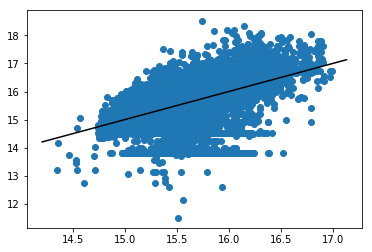

In [60]:
fig, ax = plt.subplots()
plt.scatter(classifier.oob_prediction_, y_train)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color = 'black')
plt.show()


In [61]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = mean_squared_error(y_pred_test, y_test)**0.5
sse = np.sum((y_pred_test - y_test)**2)
se = (sse/len(y_test))**0.5
print('R2-Score is : %0.2f ' % r2)
print('SE is : %0.2f ' % se)
print('SSE is : %0.2f ' % sse)
print('MSE is : %0.2f ' % mse)
print('RMSE: %0.2f ' % rmse)

R2-Score is : 0.31 
SE is : 0.51 
SSE is : 1570.03 
MSE is : 0.26 
RMSE: 0.51 


#### Feature Importance

In [62]:
data_rf = pd.DataFrame(X_train.columns, columns = ['feature'])
data_rf['fscore'] = classifier.feature_importances_[:, ]

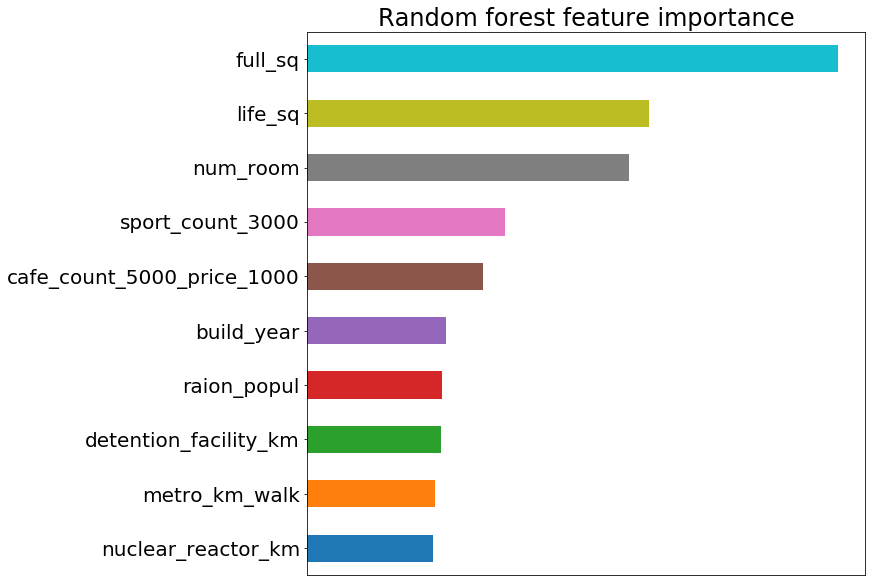

In [63]:
data_rf['fscore'] = data_rf['fscore'] / data_rf['fscore'].max()
data_rf.sort_values('fscore', ascending = False, inplace = True)
data_rf = data_rf[0:10]
data_rf.sort_values('fscore', ascending = True, inplace = True)
data_rf.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 10))
plt.title('Random forest feature importance', fontsize = 24)
plt.xlabel('')
plt.ylabel('')
plt.xticks([], [])
plt.yticks(fontsize=20)
plt.show()


#### Comparisions of the three models:

#### Summary

#### Linear Regression

Training error in linear regression is: 0.475

Testing error in linear regression is: 0.549
    
SE is : 0.55 

SSE is : 1834.63 

MSE is : 0.30 

RMSE: 0.55 
    
    
#### Decision tree

Training error in Decision Tree Classifier is: 0.503

Testing error in Decision Tree Classifier is: 0.516

SE is : 0.52 

SSE is : 1625.23 

MSE is : 0.27 

RMSE: 0.52 

    
#### Random Forest Regressor

Training error in Random Forest is: 0.434

Testing error in Random Forest is: 0.434

oob_prediction : 0.509
    
SE is : 0.51 

SSE is : 1601.94 

MSE is : 0.26 

RMSE: 0.51 


#### On this dataset, Random Forest Regressor performed better than the other two models.

#### This concludes Model Creation and Model Evaluation

#### Hyperparameter Tuning for Decision Tree Regressor

In [ ]:
classifier = DecisionTreeRegressor(max_depth = 7, random_state=100)

classifier.fit(X = X_train, y = y_train)

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

fig, ax = plt.subplots()
plt.scatter(y_pred_train, y_train)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color = 'black')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = mean_squared_error(y_pred_test, y_test)**0.5
sse = np.sum((y_pred_test - y_test)**2)
se = (sse/len(y_test))**0.5
print('R2-Score is : %0.2f ' % r2)
print('SE is : %0.2f ' % se)
print('SSE is : %0.2f ' % sse)
print('MSE is : %0.2f ' % mse)
print('RMSE: %0.2f ' % rmse)

#### This setting made the R2-Score better

#### Hyperparameter Tuning for Random Forest Regressor

In [ ]:
classifier = RandomForestRegressor(n_estimators = 40, 
                              random_state = 500, 
                              oob_score = True, 
                              max_features = 25,
                              min_samples_leaf = 10)

classifier.fit(X = X_train, y = y_train)

fig, ax = plt.subplots()
plt.scatter(classifier.oob_prediction_, y_train)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color = 'black')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = mean_squared_error(y_pred_test, y_test)**0.5
sse = np.sum((y_pred_test - y_test)**2)
se = (sse/len(y_test))**0.5
print('R2-Score is : %0.2f ' % r2)
print('SE is : %0.2f ' % se)
print('SSE is : %0.2f ' % sse)
print('MSE is : %0.2f ' % mse)
print('RMSE: %0.2f ' % rmse)

#### This setting made the R2-Score better

#### This concludes the hyperparameter Tuning

Learnings:
   1.  Data analysis and Data Cleaning
   2.  Outlier detection and analysis
   3.  Fine tuning and evaluation of multiple algorithms

References:

1. Introduction to data mining book
2. https://pandas.pydata.org/pandas-docs/version/0.25/
3. https://docs.scipy.org/doc/
4. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
5. https://towardsdatascience.com/
6. https://intellipaat.com/blog/roc-curve-in-machine-learning/

7. https://www.kaggle.com/c/sberbank-russian-housing-market/
8. https://scikit-learn.org/
